In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD027742" # Indicate Dataset Here

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

# psm_df = psm_df.drop(["126", "127N", "127C"], axis=1)

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=["126","127N","127C","128C","128N","129C","129N","130C",
                                                                "130N","131C","131N","132C","132N","133C","133N","134N"])

data_dict = {}
info_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]

channels = ["128C","129C","129N","130C","130N","131C","131N","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because reasons

medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)

# psm_df
# sdrf_df
medians_df

# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

,128C,129C,129N,130C,130N,131C,131N,132N,132C,133N,133C,134N,Median
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,21546.6348,21720.3711,22032.1504,21321.5098,19662.6133,19585.4785,19278.1758,19105.3867,18365.2617,21667.4199,16267.752,20029.834,19846.223650
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,21153.64845,21220.82225,21750.86915,20741.833,19760.9502,19658.75095,19152.74805,19024.5625,18405.48145,21549.17285,16025.0171,19783.11035,19772.030275
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,16351.24465,13021.77685,13132.41015,12519.26415,11961.5972,12081.2915,11889.97995,11502.251,11708.0835,12799.05905,10005.24025,12313.9287,12197.610100
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,17853.96585,13682.88965,13744.16945,13461.61475,12541.19385,13053.0254,12552.8589,12016.51615,11893.76415,13785.38915,10597.5249,12911.5376,12982.281500
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,16709.998,16197.1836,16458.3457,15801.1143,14843.6328,14559.4219,14347.5322,14354.2461,13994.3223,16446.4727,12217.791,15157.1416,15000.387200
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,17124.2891,16419.7109,17078.8555,16384.2832,15363.123,15216.9482,14852.8789,14862.7559,14367.8945,16963.8203,12548.2383,15321.7578,15342.440400
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,20585.6045,12518.44725,12731.43315,12465.8789,11617.7085,11548.24025,11371.3496,11088.27345,10923.1914,12338.9736,9748.3667,11695.03615,11656.372325
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,20737.8125,12575.9141,12904.1768,12600.7705,11680.5449,11626.6992,11354.3633,11305.0098,11172.7314,12833.6172,9806.1123,11794.4434,11737.494150
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,15971.79345,14128.36275,14765.19485,14187.1621,13119.37405,13188.2202,12805.1167,12776.53955,12528.7412,14463.98535,11082.4072,13297.11815,13242.669175
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,14018.0986,12521.0,12779.3867,12285.8193,11713.624,11848.3682,11568.7705,11221.7363,10985.4727,12598.1045,9831.3213,11840.2539,11844.311050


In [2]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]
        
variance_df

,128C,129C,129N,130C,130N,131C,131N,132N,132C,133N,133C,134N
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,1.085679,1.094433,1.110143,1.074336,0.990748,0.986862,0.971378,0.962671,0.925378,1.091765,0.81969,1.009252
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,1.069877,1.073275,1.100083,1.049049,0.99944,0.994271,0.968679,0.962196,0.930885,1.089882,0.810489,1.00056
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.340529,1.067568,1.076638,1.02637,0.980651,0.990464,0.974779,0.942992,0.959867,1.049309,0.820262,1.009536
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.375256,1.053966,1.058687,1.036922,0.966024,1.005449,0.966922,0.925609,0.916154,1.061862,0.816307,0.994551
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.113971,1.079784,1.097195,1.05338,0.98955,0.970603,0.956477,0.956925,0.932931,1.096403,0.814498,1.01045
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.116139,1.070215,1.113177,1.067906,1.001348,0.991821,0.968091,0.968735,0.93648,1.105679,0.817878,0.998652
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,1.766039,1.073957,1.092229,1.069448,0.996683,0.990723,0.975548,0.951263,0.9371,1.05856,0.836312,1.003317
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,1.766801,1.071431,1.099398,1.073549,0.995148,0.990561,0.967358,0.963154,0.951884,1.093386,0.835452,1.004852
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.206086,1.066882,1.114971,1.071322,0.99069,0.995888,0.966959,0.964801,0.946089,1.092226,0.836871,1.004112
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.18353,1.057132,1.078947,1.037276,0.988966,1.000343,0.976736,0.947437,0.927489,1.063642,0.830046,0.999657


In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

variance_df["Injection Time"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
    if "300ms" in dataset:
        variance_df.at[dataset, "Injection Time"] = "300ms"
    elif "500ms" in dataset:
        variance_df.at[dataset, "Injection Time"] = "500ms"
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume


variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df

# variance_df.at["20200517_MK_ES_E1200_precol_scMS_300ms_8227_P6_S3", "133N"] = 1.00 # DELETE THIS LATER


{0.0, 98.0, 42.0, 14.0, 434.0, 210.0}


,128C,129C,129N,130C,130N,131C,131N,132N,132C,133N,133C,134N,Carrier Volume,Injection Time
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,1.085679,1.094433,1.110143,1.074336,0.990748,0.986862,0.971378,0.962671,0.925378,1.091765,0.81969,1.009252,14,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,1.069877,1.073275,1.100083,1.049049,0.99944,0.994271,0.968679,0.962196,0.930885,1.089882,0.810489,1.00056,14,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.340529,1.067568,1.076638,1.02637,0.980651,0.990464,0.974779,0.942992,0.959867,1.049309,0.820262,1.009536,210,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.375256,1.053966,1.058687,1.036922,0.966024,1.005449,0.966922,0.925609,0.916154,1.061862,0.816307,0.994551,210,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.113971,1.079784,1.097195,1.05338,0.98955,0.970603,0.956477,0.956925,0.932931,1.096403,0.814498,1.01045,42,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.116139,1.070215,1.113177,1.067906,1.001348,0.991821,0.968091,0.968735,0.93648,1.105679,0.817878,0.998652,42,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,1.766039,1.073957,1.092229,1.069448,0.996683,0.990723,0.975548,0.951263,0.9371,1.05856,0.836312,1.003317,434,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,1.766801,1.071431,1.099398,1.073549,0.995148,0.990561,0.967358,0.963154,0.951884,1.093386,0.835452,1.004852,434,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.206086,1.066882,1.114971,1.071322,0.99069,0.995888,0.966959,0.964801,0.946089,1.092226,0.836871,1.004112,98,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.18353,1.057132,1.078947,1.037276,0.988966,1.000343,0.976736,0.947437,0.927489,1.063642,0.830046,0.999657,98,


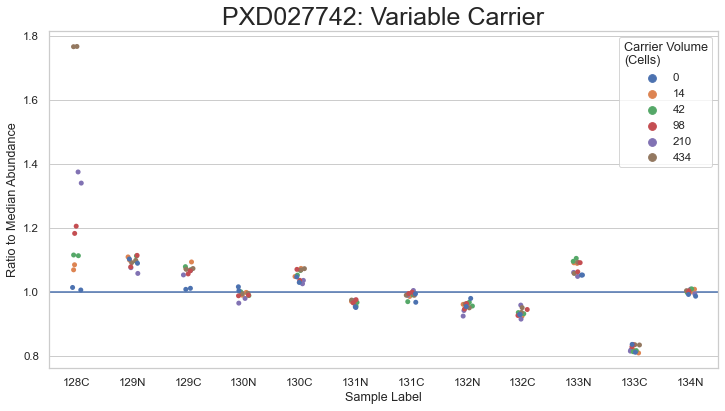

In [9]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume", "Injection Time"], value_vars=["128C","129C","129N","130C","130N","131C","131N","132N","132C","133N","133C","134N"], ignore_index=False)
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)

sns.set(font_scale=1.05)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Injection Time", # color='0', 
                     order=["128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
else:
    title = dataset_id + ": Variable Carrier"
    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", 
                     order=["128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
    
    plt.legend(title="Carrier Volume\n(Cells)") # , alignment="center") # Need to Update matplotlib


boxplot.set_title(title, fontsize=25)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()

In [8]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.1
